## Objective

<p>The objective of the project is to use **Fashion-MNIST** data set to identify the different fashion products from the given pictures using various most efficientpossible models and report the values of the performance measures for different models. To make sure the models are trainig on **unseen** data, we will also use **cross-validation** method to train.</p>

Also, find the model that performs best, and fine-tune the same model using one of the model fine-tuning techniques -**Dimensionality Reduction using PCA, ensemble model**, and report the best possible combination of hyperparameters for the selected model using Grid Search CV method. Lastly, use the selected model to make final predictions and report the values of various performance measures for the same.<br>

To summarize, the following concepts of Python ML are used:
- Panda,Matplot,scikit-learn
- Shuffling and splitting of data
- Cross Validation
- Scaling of data
- Linear Multi-class Classification
- Random Forest classification
- Ensemble
- Dimensionality Reduction using PCA
- GridSearchCV for hyperparameters

## About the dataset

Fashion-MNIST is a dataset of Zalando's (http://www.zalando.com) article images —consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. (See GitHub Repo)

Let us load the Fashion MNIST dataset from Cloudxlab's below mentioned folder location (this dataset is copied from Zalando Research repository).

Location on the cloudx lab server - '/cxldata/datasets/project/fashion-mnist/' 
***

we need to load the below 4 dataset files whcich are already sorted into training n test sets:

- train-images-idx3-ubyte.gz - the Training dataset<br>
- train-labels-idx1-ubyte.gz - the Training labels (target dataset)<br>
- t10k-images-idx3-ubyte.gz -  the Test dataset<br>
- t10k-labels-idx1-ubyte.gz -  the Test labels<br>

The class labels for Fashion MNIST are as given below:<br>
 Label    Description

    0         T-shirt/top
    1         Trouser 
    2         Pullover 
    3         Dress
    4         Coat
    5         Sandal 
    6         Shirt
    7         Sneaker
    8         Bag
    9         Ankle boot

In [3]:
import pandas as pd
import gzip
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#The user defined utilty that displays the input dataset instance (image) on the screen
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [5]:
# Store the path to data files in variables 
#filePath_train_set = '/cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz'
#for local testing to be removed
filePath_train_set = 'train-images-idx3-ubyte.gz'
#filePath_train_label = '/cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz'
filePath_train_label = 'train-labels-idx1-ubyte.gz'
#filePath_test_set = '/cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz'
filePath_test_set = 't10k-images-idx3-ubyte.gz'
#filePath_test_label = '/cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz'
filePath_test_label = 't10k-labels-idx1-ubyte.gz'

In [6]:
#Read the data files into various varibales
with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)
        

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

In [7]:
X_train = trainSet 
X_test = testSet
y_train =  trainLabel
y_test = testLabel

In [8]:
# a look at the data read
len(X_train)


60000

In [9]:
len(X_test)

10000

In [10]:
len(y_test)

10000

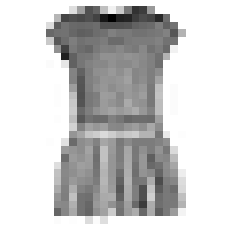

In [11]:
# Using the utilty fucntion to print out a particualr image by passing corresponding features
showImage(X_train[3])

In [1]:
y_train[3]

NameError: name 'y_train' is not defined

### Fashion MNIST - Data Preparation
Two techniques on the data to be applied as pre-processing
- Shuffling

- Feature Scaling to make all features have same range .(Necessity for PCA to be applied for dimentionality redcution later)

In [13]:
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

### Train various Models on the Dataset
#### The following models are chosen

- Softmax Regression (multi-class LogisticRegression)

- RandomForestClassifier

- Ensemble with Grid Search CV after dimnensionality redution with PCA (with soft voting)

In [47]:
#Libraries to use to measure the performance parameters of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_score, recall_score
from sklearn.metrics import f1_score

### Training the Model - Softmax Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# using Softmax Regression (multi-class classification problem)

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

# 'C' is hyprparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm

In [18]:
log_clf.fit(X_train_scaled,y_train)

C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [19]:
##Test the prediction on a single set of features (for basic checking of the model)
y_train_predict = log_clf.predict(X_train[0].reshape(1,-1))

In [20]:
y_train[0] 

8

In [21]:
y_train_predict[0]

8

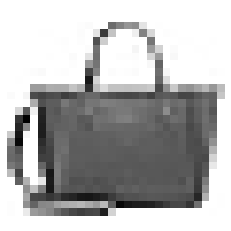

In [22]:
showImage(X_train[0])

**From the description provided at the begining of the note, the label 8 is for 'bag'. The model seems to be working fine**

In [23]:
#After checking the correctness of one set of features, predict for the entire training data set
y_train_predict = log_clf.predict(X_train_scaled)

In [24]:
# check the performance parameters for the model Softmax Regression
log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Softmax Regression Logistic Accuracy: ", log_accuracy)
print("Softmax Regression Logistic Precision: ", log_precision)
print("Softmax Regression Logistic Recall: ", log_recall)
print("Softmax Regression Logistic F1 Score: ", log_f1_score) 

Softmax Regression Logistic Accuracy:  0.87755
Softmax Regression Logistic Precision:  0.8766648092442357
Softmax Regression Logistic Recall:  0.87755
Softmax Regression Logistic F1 Score:  0.8769448048542856


### Training the Model - RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rnd_clf = RandomForestClassifier()

Train the model on training dataset **without** scaling
Scaling is not needed for Decision Tree based algorithms like Random Forest and XGBoost

In [27]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
#Predcit for a single instance first
y_train_predict = rnd_clf.predict(X_train[0].reshape(1,-1))

In [29]:
#Actual label
y_train[0] 

8

In [30]:
#Predcited label
y_train_predict[0]

8

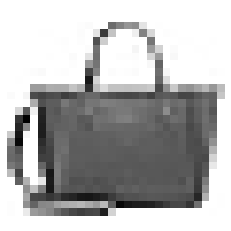

In [31]:
#Actual image of the instance used to predict
showImage(X_train[0])

In [32]:
##Make the predictions on the complete training dataset
y_train_predict = rnd_clf.predict(X_test)

In [33]:
## find out the performance parameters of the Random FOrest Classifier 
rnd_accuracy = accuracy_score(y_test, y_train_predict)
rnd_precision = precision_score(y_test, y_train_predict, average='weighted')
rnd_recall = recall_score(y_test, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_test, y_train_predict, average='weighted')

In [34]:
print("Random Forrest Accuracy: ",rnd_accuracy )
print("Random Forrest Precision: ", rnd_precision)
print("Random Forrest Recall: ", rnd_recall)
print("Random Forrest F1 Score: ", rnd_f1_score) 

Random Forrest Accuracy:  0.8769
Random Forrest Precision:  0.8757887728860132
Random Forrest Recall:  0.8769
Random Forrest F1 Score:  0.8754157370939752


### Cross validaton - resampling of data and evaluation of model 

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called **k-fold cross-validation**. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on **unseen data**. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [35]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix

In [36]:
##Utility user defined function to prinout performance parameters after cross-validation
def display_scores(scores):
    print("score ", scores)
    print("mean " ,scores.mean())
    print("SDn " ,scores.std())

#### Cross-Validation - Softmax Regression

In [37]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10,random_state=42)

In [38]:
# For Softmax regression the scaled train data is used as regression models are affected by unscaled data
log_cv_scores =cross_val_score(log_clf, X_train_scaled,y_train, cv=3, scoring="accuracy")

C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [39]:
# Print the mean and standard Deviation
display_scores(log_cv_scores)

score  [0.84905 0.84825 0.84395]
mean  0.8470833333333333
SDn  0.0022395436042987695


In [40]:
log_cv_accuracy = log_cv_scores.mean()

In [41]:
y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)

C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [43]:
#Confusion matrix to analyze predicted and actual values
cm = confusion_matrix(y_train,y_train_pred)

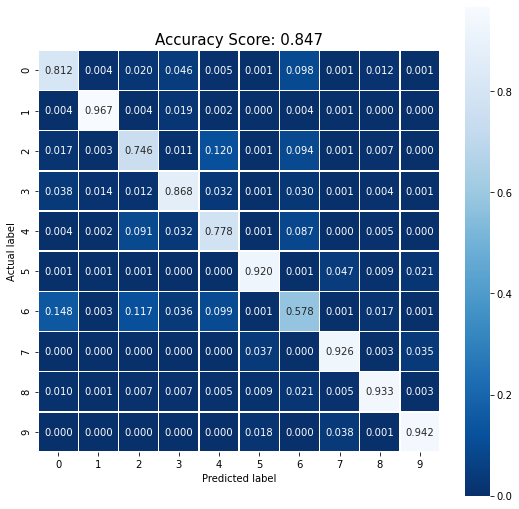

In [50]:
#plot the confusion matrix using seabrn
import seaborn as sns
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(log_cv_accuracy) 
plt.title(all_sample_title, size = 15);


In [52]:
## Calculate the precision 
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
##Calculate the recall score by 
log_cv_recall  = recall_score(y_train, y_train_pred, average='weighted')
##Calculate the F1 score 
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

In [57]:
#Print the performance parameters 
print("Accuracy ",log_cv_accuracy )
print("Precision " ,log_cv_precision )
print("Recall ", log_cv_recall)
print("F1 score ", log_cv_f1_score)

Accuracy  0.8470833333333333
Precision  0.8458694883855286
Recall  0.8470833333333333
F1 score  0.846272242627941


#### Cross-Validation - RandomForestClassifier

In [54]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10,random_state=42)

In [58]:
rnd_cv_scores =cross_val_score(rnd_clf, X_train_scaled,y_train, cv=3, scoring="accuracy")

In [59]:
display_scores(rnd_cv_scores)

score  [0.85125 0.84755 0.84575]
mean  0.8481833333333334
SDn  0.002289589968143228


In [60]:
rnd_cv_accuracy = rnd_cv_scores.mean()

In [61]:
# Scaled traning data is used with Random Forent classifier
y_train_pred = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)

In [62]:
cm = confusion_matrix(y_train,y_train_pred)

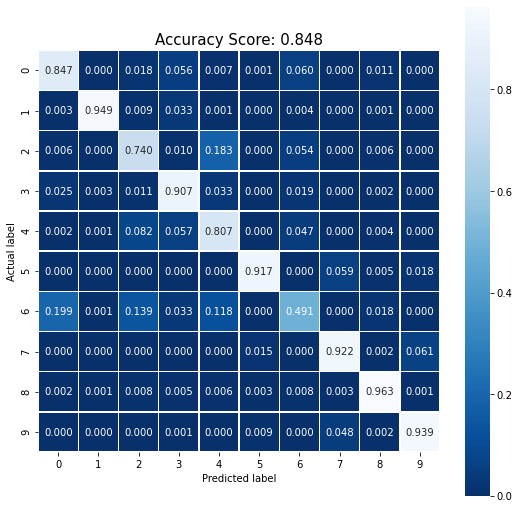

In [63]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(rnd_cv_accuracy) 
plt.title(all_sample_title, size = 15);


In [63]:
rnd_cv_precision = precision_score(y_train,y_train_pred, average="weighted")
rnd_cv_recall = recall_score(y_train,y_train_pred, average="weighted")
rnd_cv_f1_score = f1_score(y_train,y_train_pred, average="weighted")

In [64]:
print("RF CV Accuracy ",rnd_cv_accuracy )
print("RF CV Precision " ,rnd_cv_precision )
print("RF CV Recall ", rnd_cv_recall)
print("RF CV F1 score ", rnd_cv_f1_score)

RF CV Accuracy  0.8481833333333334
RF CV Precision  0.8481896337531114
RF CV Recall  0.8481833333333333
RF CV F1 score  0.8451593377633863


### Selecting the Model - Cross-Validation - Comparison

In [65]:
print("=== Softmax === ")
display_scores(log_cv_scores)
print("Softmax accuracy:", log_cv_accuracy)
print("Softmax precision:", log_cv_precision)
print("Softmax recall:", log_cv_recall)
print("Softmax f1_score:", log_cv_f1_score)

print("=== Random Forest === ")
display_scores(rnd_cv_scores)
print("Random Forest Accuracy:", rnd_cv_accuracy)
print("Random Forest precision:", rnd_cv_precision)
print("Random Forest recall :", rnd_cv_recall )
print("Random Forest f1_score:", rnd_cv_f1_score)

=== Softmax === 
score  [0.84905 0.84825 0.84395]
mean  0.8470833333333333
SDn  0.0022395436042987695
log_cv_accuracy: 0.8470833333333333
log_cv_precision: 0.8458694883855286
log_cv_recall: 0.8470833333333333
log_cv_f1_score: 0.846272242627941
=== Random Forest === 
score  [0.85125 0.84755 0.84575]
mean  0.8481833333333334
SDn  0.002289589968143228
rnd_cv_accuracy: 0.8481833333333334
rnd_cv_precision: 0.8481896337531114
rnd_cv_recall : 0.8481833333333333
rnd_cv_f1_score: 0.8451593377633863


From the results of the cross-validation process, we see that both the logistic regression and random forest have given the best results **accuracy nearly - 85%, standard deviation for accuracy - 0.002, Precision, Recall, F1 score all nearly 0.85**

Let us use **Ensemble method (Voting Classifier)** and proceed with the fine-tuning of the model (hyperparameters tuning)

### Fine Tuning the Model
#### Dimensionality Reduction and Grid SearchCV for hyperparameter optmization

One of the ways to fine tune and automate the process of choosing among multiple models is **GridSearchCV**.

**GridSearchCV** helps in automating the tuning of hyperparameters by looping through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.
But Grid search takes a lot of time on large datasets. Hence, let us apply **Dimensionality Reduction** to the training dataset to **reduce the number of features in the dataset**, so that the time taken for grid search and prediction is reduced. 

Also, we will calculate the scores based on the reduced features.

In [66]:
#For Dimentionality Reduction in Principal Components Analysis
from sklearn.decomposition import PCA

In [67]:
pca = PCA(n_components=0.99)

In [68]:
## Apply the PCA on the training set and store the reduced training set
X_train_reduced = pca.fit_transform(X_train)

In [69]:
pca.n_components_

459

In [70]:
# Checking if hit 99% minimum?
np.sum(pca.explained_variance_ratio_)

0.9900347820630975

In [71]:
##PCA can also take the compressed representation of the data (lower dimensional data) back to an approximation of the original high dimensional data
X_train_recovered = pca.inverse_transform(X_train_reduced)

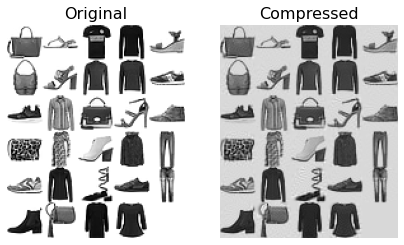

In [72]:
import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

 ### Fine-Tuning the Model - Grid Search - Tuning Hyperparameters
 
Now that the dimentionality reduction is acheived,now perform the Grid Search using the dimensionally reduced training dataset X_train_reduced

In [73]:
# Libraries for ensemble-GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
## Dictionary object to hold the hyperparameters we want to try
param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10, 15],
    }]

In [75]:
#SoftMax Regression classifier Object to be used in ensemble 
log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)

In [76]:
#Random classifier object to be used in ensemble  
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)

In [77]:
#Ensemble Model object with SoftMax and RandomForest classifier objects with 'soft' voting option
voting_clf_grid_search = VotingClassifier(estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],voting='soft')


In [78]:
## GridSearchCV object with ensemble model object and the hyperparameter  dictionary
grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring="neg_mean_squared_error")


In [79]:
grid_search.fit(X_train_reduced, y_train)
grid_search.best_params_
grid_search.best_estimator_


C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Prasanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=5, multi_class='multinomial',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=20,
                                                     random_state=42))],
                 voting='soft')

Let's look at the score of each hyperparameter combination used during the grid search

In [80]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(" RMSE ",np.sqrt(-mean_score), params)

 RMSE  1.380380382358428 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
 RMSE  1.3714651532819442 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


### Evaluate the Model Evaluating Final Model on Test Dataset

Final Accuracy:  0.8477
Final Precision:  0.8455248386644493
Final Recall:  0.8477
Final F1 Score:  0.8460425762332676


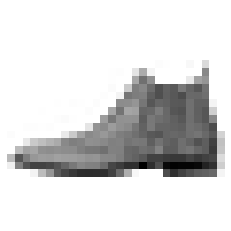

In [81]:
# Evaluate final model on the test Set

final_model = grid_search.best_estimator_

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# we have to use pca object of training dataset (which we got on training dataset during dimensionality reduction)
# and only apply transform on test dataset (NOT fit_transform) 

X_test_reduced = pca.transform(X_test)

y_test_predict = final_model.predict(X_test_reduced)

#Performance parameters of the final model
confusion_matrix(y_test, y_test_predict)
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')


print("Final Accuracy: ", final_accuracy)
print("Final Precision: ", final_precision)
print("Final Recall: ", final_recall)
print("Final F1 Score: ", final_f1_score)

# Just check with a sample value, if the predictions were correct

y_test[0]

y_test_predict[0]

showImage(X_test[0])
